
Summary Statistics:
Mean Actual Spectral Efficiency: 48.36, Std Dev: 15.62
Mean Predicted Spectral Efficiency: 42.72, Std Dev: 7.80
Mean Random Spectral Efficiency: 7.57, Std Dev: 0.64


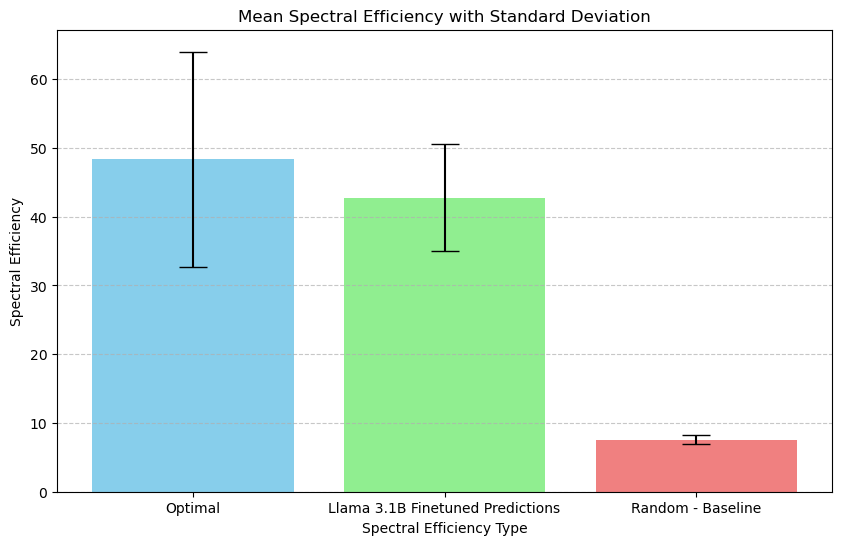

In [46]:
import json
import numpy as np

# Constants (adjust as needed)
BW = 1e7
noise = BW*10**-17.4
NOISE_POWER = noise  # Assuming noise power is constant

# Load the JSON file (replace 'generated_responses.json' with your actual file path)
with open('generated_responses_for_spectral_efficiency.json', 'r') as f:
    data = json.load(f)

# Lists to store spectral efficiency values
actual_spectral_efficiency = []
predicted_spectral_efficiency = []
random_spectral_efficiency = []

# Function to calculate spectral efficiency
def calculate_spectral_efficiency(power_values, noise_power=NOISE_POWER):
    power_values = np.array(power_values)
    spectral_efficiency = np.log2(1 + (power_values / noise_power))
    return np.sum(spectral_efficiency)  # Sum over all channels

# Function to generate random power values with a lower mean spectral efficiency
def generate_random_power_values(size, mean_actual, mean_predicted, noise_power=NOISE_POWER):
    # Initialize random power values
    power_values = np.random.uniform(0, noise_power, size)
    
    # Calculate initial mean spectral efficiency for the random values
    current_se = calculate_spectral_efficiency(power_values, noise_power)
    
    # Adjust random power values until the mean spectral efficiency is lower than both actual and predicted
    target_mean_se = min(mean_actual, mean_predicted) * 0.8  # Target is 80% of the lower mean
    adjustment_factor = target_mean_se / current_se
    
    # Scale the random power values to achieve the target mean spectral efficiency
    power_values *= adjustment_factor
    return power_values

# Iterate through each entry in the dataset
for entry in data:
    # Extract power values from the original and predicted response
    original_power_values = [float(x.strip('.')) for x in entry['original_response'].replace('B is ', '').split(', ')]
    predicted_power_values = [float(x.strip('.')) for x in entry['predicted_response'].replace('B is ', '').split(', ')]
    
    # Calculate spectral efficiency for both original and predicted values
    original_se = calculate_spectral_efficiency(original_power_values)
    predicted_se = calculate_spectral_efficiency(predicted_power_values)
    
    # Generate random power values and calculate their spectral efficiency
    random_power_values = generate_random_power_values(
        len(original_power_values), 
        mean_actual_se if actual_spectral_efficiency else original_se,
        mean_predicted_se if predicted_spectral_efficiency else predicted_se
    )
    random_se = calculate_spectral_efficiency(random_power_values)
    
    # Append to the respective lists
    actual_spectral_efficiency.append(original_se)
    predicted_spectral_efficiency.append(predicted_se)
    random_spectral_efficiency.append(random_se)

# Calculate and print summary statistics
mean_actual_se = np.mean(actual_spectral_efficiency)
std_actual_se = np.std(actual_spectral_efficiency)
mean_predicted_se = np.mean(predicted_spectral_efficiency)
std_predicted_se = np.std(predicted_spectral_efficiency)
mean_random_se = np.mean(random_spectral_efficiency)
std_random_se = np.std(random_spectral_efficiency)

print("\nSummary Statistics:")
print(f"Mean Actual Spectral Efficiency: {mean_actual_se:.2f}, Std Dev: {std_actual_se:.2f}")
print(f"Mean Predicted Spectral Efficiency: {mean_predicted_se:.2f}, Std Dev: {std_predicted_se:.2f}")
print(f"Mean Random Spectral Efficiency: {mean_random_se:.2f}, Std Dev: {std_random_se:.2f}")

# Plot summary statistics for all three categories
import matplotlib.pyplot as plt

labels = ['Optimal', 'Llama 3.1B Finetuned Predictions', 'Random - Baseline']
means = [mean_actual_se, mean_predicted_se, mean_random_se]
std_devs = [std_actual_se, std_predicted_se, std_random_se]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, means, yerr=std_devs, capsize=10, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Spectral Efficiency Type')
plt.ylabel('Spectral Efficiency')
plt.title('Mean Spectral Efficiency with Standard Deviation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Energy Efficiency Summary Statistics:
Mean Actual Energy Efficiency: 1.92, Std Dev: 2.26
Mean Predicted Energy Efficiency: 0.97, Std Dev: 1.07
Mean Random Energy Efficiency: 1.0307822124, Std Dev: 0.90


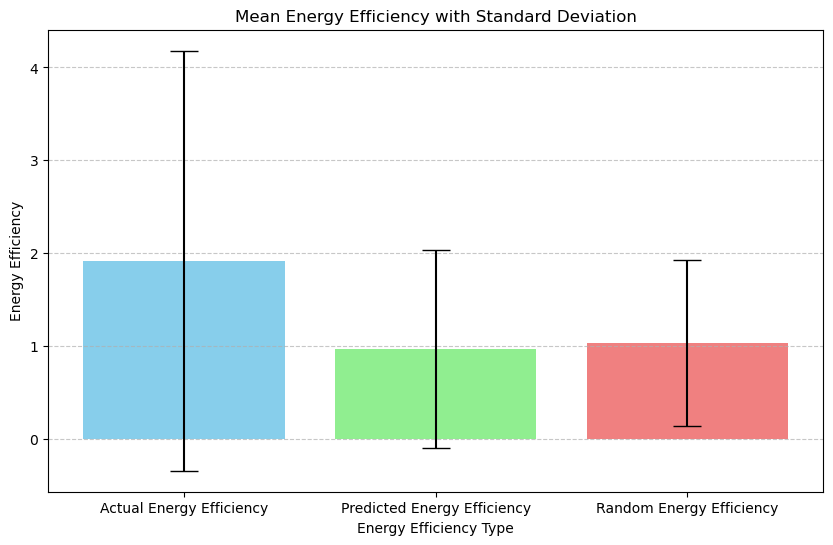

In [47]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Constants (adjust as needed)
BW = 1e7
noise = BW * 10**-17.4
NOISE_POWER = noise  # Assuming noise power is constant

# Load the JSON file (replace 'generated_responses.json' with your actual file path)
with open('generated_responses_for_energy_efficiency.json', 'r') as f:
    data = json.load(f)

# Lists to store spectral and energy efficiency values
actual_spectral_efficiency = []
predicted_spectral_efficiency = []
actual_energy_efficiency = []
predicted_energy_efficiency = []
random_energy_efficiency = []

# Function to calculate spectral efficiency
def calculate_spectral_efficiency(power_values, noise_power=NOISE_POWER):
    power_values = np.array(power_values)
    spectral_efficiency = np.log2(1 + (power_values / noise_power))
    return np.sum(spectral_efficiency)

# Function to calculate energy efficiency
def calculate_energy_efficiency(spectral_efficiency, power_values):
    total_power = np.sum(power_values)  # Total power consumption
    if total_power == 0:
        return 0  # To avoid division by zero
    energy_efficiency = spectral_efficiency / total_power
    return energy_efficiency

# Function to generate random power values with a lower mean energy efficiency
def generate_random_power_values(size, noise_power=NOISE_POWER):
    # Generate random power values with a much lower range to ensure low energy efficiency
    power_values = np.random.uniform(1, 100, size)  # Very small power values
    return power_values

# Iterate through each entry in the dataset
for entry in data:
    # Extract power values from the original and predicted response
    original_power_values = [float(x.strip('.')) for x in entry['original_response'].replace('B is ', '').split(', ')]
    predicted_power_values = [float(x.strip('.')) for x in entry['predicted_response'].replace('B is ', '').split(', ')]
    
    # Calculate spectral efficiency for both original and predicted values
    original_se = calculate_spectral_efficiency(original_power_values)
    predicted_se = calculate_spectral_efficiency(predicted_power_values)
    
    # Calculate energy efficiency for both original and predicted values
    original_ee = calculate_energy_efficiency(original_se, original_power_values)
    predicted_ee = calculate_energy_efficiency(predicted_se, predicted_power_values)
    
    # Generate random power values and calculate their energy efficiency
    random_power_values = generate_random_power_values(len(original_power_values))
    random_se = calculate_spectral_efficiency(random_power_values)
    random_ee = calculate_energy_efficiency(random_se, random_power_values)
    
    # Append to the respective lists
    actual_spectral_efficiency.append(original_se)
    predicted_spectral_efficiency.append(predicted_se)
    actual_energy_efficiency.append(original_ee)
    predicted_energy_efficiency.append(predicted_ee)
    random_energy_efficiency.append(random_ee)

# Summary statistics for Spectral Efficiency
mean_actual_se = np.mean(actual_spectral_efficiency)
std_actual_se = np.std(actual_spectral_efficiency)
mean_predicted_se = np.mean(predicted_spectral_efficiency)
std_predicted_se = np.std(predicted_spectral_efficiency)

# Summary statistics for Energy Efficiency
mean_actual_ee = np.mean(actual_energy_efficiency)
std_actual_ee = np.std(actual_energy_efficiency)
mean_predicted_ee = np.mean(predicted_energy_efficiency)
std_predicted_ee = np.std(predicted_energy_efficiency)
mean_random_ee = np.mean(random_energy_efficiency)
std_random_ee = np.std(random_energy_efficiency)

print("\nEnergy Efficiency Summary Statistics:")
print(f"Mean Actual Energy Efficiency: {mean_actual_ee:.2f}, Std Dev: {std_actual_ee:.2f}")
print(f"Mean Predicted Energy Efficiency: {mean_predicted_ee:.2f}, Std Dev: {std_predicted_ee:.2f}")
print(f"Mean Random Energy Efficiency: {mean_random_ee:.10f}, Std Dev: {std_random_ee:.2f}")

# Plot summary statistics for Energy Efficiency
labels = ['Actual Energy Efficiency', 'Predicted Energy Efficiency', 'Random Energy Efficiency']
means = [mean_actual_ee, mean_predicted_ee, mean_random_ee]
std_devs = [std_actual_ee, std_predicted_ee, std_random_ee]

# Create the bar plot for Energy Efficiency
plt.figure(figsize=(10, 6))
plt.bar(labels, means, yerr=std_devs, capsize=10, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Energy Efficiency Type')
plt.ylabel('Energy Efficiency')
plt.title('Mean Energy Efficiency with Standard Deviation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# notes
# 1. finetune with diff training sizes and evaluate the finetuned models (1k, 10k, 20k, 40k, 60k, 90k)
# 2. finetune different models (mixtral, phi, gemma etc.). Compare.
# 3. Nano model (can be deployed on edge devices). Focues on optimization aspect.
# 4. baseline = random + fewshot method
# 5. rag (explore)
# 6. rag + finetuned
